# **Tugas Kecil IF3270 - Pembelajaran Mesin**
---------------------------------------
Anggota Kelompok
* 13520134 Raka Wirabuana Ninagan
* 13520150 Haidar Ihzaulhaq

In [58]:
# Import General Library
import pandas as pd
import matplotlib as mplot
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder

# Import train and test data split
from sklearn.model_selection import train_test_split

# Import decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Import ID3Estimator
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz
from IPython.display import Image

# Import K Means
from sklearn.cluster import KMeans

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import Neural Network
from sklearn.neural_network import MLPClassifier

# Import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# Import Pickle
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#  Ambil dataset breastcanceer
bcdata = load_breast_cancer()

df = pd.DataFrame(bcdata.data, columns=bcdata.feature_names)
df['target'] = pd.Series(bcdata.target)

#  Encode data bertipe kategorikal
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'category':
        df[column] = encoder.fit_transform(df[column])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## **Nomor 1 : Membaca Dataset**
---------------------------------------------------------------
Gunakanlah sklearn.datasets untuk membaca dataset breast-cancer. <br>
Membagi dataset menjadi 80% data training dan 20% data testing.

In [32]:
Y = df.target
X = df[bcdata.feature_names]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [33]:
# Untuk pemeriksaan jumlah pembagian proporsi dataset
print(len(X_test))
print((2/10) * 569)

114
113.80000000000001


## **Nomor 2 : Melakukan Pembelajaran dengan Algoritma yang Ditentukan**
---------------------------------------------------------------
Menggunakan metode ```fit(X,Y)``` untuk melakukan pembelajaran dengan algoritma di bawah ini:
* DecisionTreeClassifier
* Id3Estimator
* K Means
* LogisticRegression
* Neural_network
* SVM

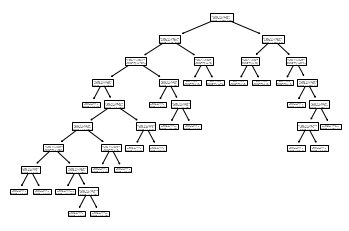

In [34]:
# DecisionTreeClassifier model
dtcModel = tree.DecisionTreeClassifier()
dtcModel.fit(X_train, Y_train)
tree.plot_tree(dtcModel)
print() # erase the long chunk of output

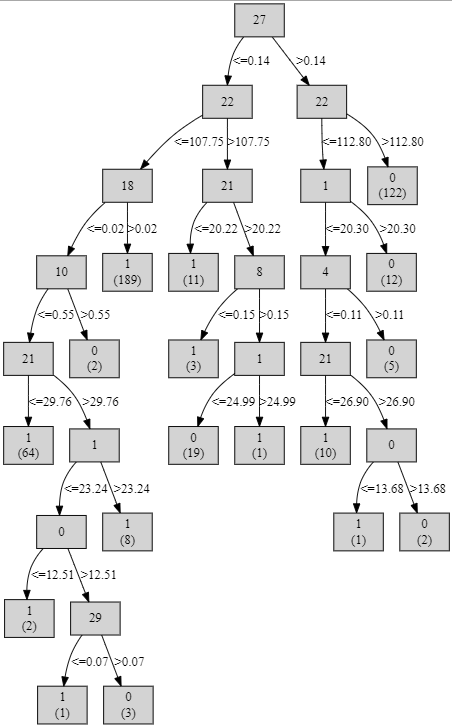

In [35]:
# Id3Estimator model
# ---------------------------------------- BAGIAN HAIDAR
# id3eModel = tree.DecisionTreeClassifier()
# id3eModel.fit(X_train, Y_train)
id3eModel = Id3Estimator()
id3eModel = id3eModel.fit(X_train, Y_train)
tree = export_graphviz(id3eModel.tree_, 'tree.dot', None)
Image(filename='id3tree.png')

In [36]:
# K Means model
# nCluster = 2
# kmeansModel = KMeans(n_clusters=nCluster, random_state=0, n_init='auto').fit(X_train)
# kmeansModel.fit(X_train, Y_train)

In [37]:
# LogisticRegression model
lrModel = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, Y_train)

c:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# NeuralNetwork model
nnModel = MLPClassifier(random_state=0, max_iter=500).fit(X_train, Y_train)
nnModel.fit(X_train, Y_train)

MLPClassifier(max_iter=500, random_state=0)

In [39]:
# SVM model
svmModel = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svmModel.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

## **Nomor 3 : Menyimpan Model**
---------------------------------------------------------------
Menyimpan model menggunakan libary ```pickle```

In [40]:
with open("modelfile/DTCmodel.pkl", "wb") as file:
    pickle.dump(dtcModel, file)

with open("modelfile/ID3model.pkl", "wb") as file:
    pickle.dump(id3eModel, file)

# with open("modelfile/KMeansmodel.pkl", "wb") as file:
#     pickle.dump(kmeansModel, file)

with open("modelfile/LRmodel.pkl", "wb") as file:
    pickle.dump(lrModel, file)

with open("modelfile/NNmodel.pkl", "wb") as file:
    pickle.dump(nnModel, file)

with open("modelfile/SVMmodel.pkl", "wb") as file:
    pickle.dump(svmModel, file)

## **Nomor 4 : Melakukan Prediksi**
---------------------------------------------------------------
Melakukan proses prediction dengan load model yang sudah disimpan
memanfaatkan pustaka pickle, kemudian memanggil method ```predict(datatest)```.
Lakukan evaluasi hasil prediksi dengan menggunakan metric: Accuracy, Precision,
Recall dan F1; serta confusion_matrix hasil prediksi model.

In [41]:
evalindex = ['Decision Tree', 'Id3 Estimator', 'KMeans', 'Logistic Regression', 'Neural Network', 'SVM']
evalcolumns = ['Accuracy', 'Precision', 'Recall', 'F1']

acc_list = []
prec_list = []
recall_list = []
f1_list = []

In [42]:
def loadModel(filepath):
    with open(filepath, "rb") as file:
        loadedmodel = pickle.load(file)
        return loadedmodel

In [43]:
def evaluate(predresult):
    accuracy = 0.0
    precision = 0.0
    recall = 0.0
    f1 = 0.0    
    try:
        accuracy = accuracy_score(Y_test, predresult)
        acc_list.append(accuracy)
        print("Accuracy : ", accuracy)
    except:
        print("Error: Learning Type Error - Accuracy")

    try:
        precision = precision_score(Y_test, predresult)
        prec_list.append(precision)
        print("Precision : ", precision)
    except:
        print("Error: Learning Type Error - Precision")
    
    try:
        recall = recall_score(Y_test, predresult)
        recall_list.append(recall)
        print("Recall : ", recall)
    except:
        print("Error: Learning Type Error - Recall")
    
    try:
        f1 = f1_score(Y_test, predresult, average='micro')
        f1_list.append(f1)
        print("F1 : ", f1)
    except:
        print("Error: Learning Type Error - F1")
    
    try:
        confusionmat = confusion_matrix(Y_test, predresult)
        print("/ --- Confusion Matrix --- /")
        print(confusionmat)
    except:
        print("Error: Learning Type Error - Confusion Matrix")

    return accuracy, precision, recall, f1


In [44]:
# Prediksi data menggunakan model DecisionTreeClassification
loadedDTC = loadModel("modelfile/DTCmodel.pkl")
dtcacc, dtcprec, dtcrecall, dtcf1 = evaluate(loadedDTC.predict(X_test))

Accuracy :  0.9122807017543859
Precision :  0.9523809523809523
Recall :  0.8955223880597015
F1 :  0.9122807017543859
/ --- Confusion Matrix --- /
[[44  3]
 [ 7 60]]


In [45]:
# # Prediksi data menggunakan model ID3Estimator
loadedID3E = loadModel("modelfile/ID3model.pkl")
id3macc, id3mprec, id3mrecall, id3mf1 = evaluate(loadedID3E.predict(X_test))

Accuracy :  0.9122807017543859
Precision :  0.9384615384615385
Recall :  0.9104477611940298
F1 :  0.9122807017543859
/ --- Confusion Matrix --- /
[[43  4]
 [ 6 61]]


In [47]:
# Prediksi data menggunakan model K Means
# loadedkmeans = loadModel("modelfile/KMeansmodel.pkl")
# kmeansacc, kmeansprec, kmeansrecall, kmeansf1 = evaluate(loadedkmeans.predict(X_test))

In [48]:
# Prediksi data menggunakan model LogisticRegression
loadedLR = loadModel("modelfile/LRmodel.pkl")
lracc, lrprec, lrrecall, lrf1 = evaluate(loadedLR.predict(X_test))

Accuracy :  0.9473684210526315
Precision :  0.9841269841269841
Recall :  0.9253731343283582
F1 :  0.9473684210526315
/ --- Confusion Matrix --- /
[[46  1]
 [ 5 62]]


In [49]:
# Prediksi data menggunakan model NeuralNetwork
loadedNN = loadModel("modelfile/NNmodel.pkl")
nnacc, nnprec, nnrecall, nnf1 = evaluate(loadedNN.predict(X_test))

Accuracy :  0.9473684210526315
Precision :  0.9552238805970149
Recall :  0.9552238805970149
F1 :  0.9473684210526315
/ --- Confusion Matrix --- /
[[44  3]
 [ 3 64]]


In [50]:
# Prediksi data menggunakan model SVM
loadedSVM = loadModel("modelfile/SVMmodel.pkl")
svmacc, svmprec, svmrecall, svmf1 = evaluate(loadedSVM.predict(X_test))

Accuracy :  0.9824561403508771
Precision :  0.9710144927536232
Recall :  1.0
F1 :  0.9824561403508771
/ --- Confusion Matrix --- /
[[45  2]
 [ 0 67]]


## **Nomor 5 : Analisis Hasil Metrik Evaluasi**
---------------------------------------------------------------
Analisis hasil metrik evaluasi yang sudah diperoleh untuk semua algoritma
pembelajaran, dalam bentuk perbandingan nilai dan penjelasan singkat mengenai
hasil tersebut

### Akurasi

In [52]:
print("Akurasi DecisionTreeClassification = ", dtcacc)
print("Akurasi DecisionTreeClassification = ", id3macc)
# print("Akurasi K Means = ", kmeansacc)
print("Akurasi LogisticRegression = ", lracc)
print("Akurasi NeuralNetwork = ", nnacc)
print("Akurasi SVM = ", svmacc)

Akurasi DecisionTreeClassification =  0.9122807017543859
Akurasi DecisionTreeClassification =  0.9122807017543859
Akurasi LogisticRegression =  0.9473684210526315
Akurasi NeuralNetwork =  0.9473684210526315
Akurasi SVM =  0.9824561403508771


### Presisi

In [54]:
print("Presisi DecisionTreeClassification = ", dtcprec)
print("Akurasi DecisionTreeClassification = ", id3mprec)
# print("Presisi K Means = ", kmeansprec) # Harusnya 0, karena unsupervised -> harusnya gabisa
print("Presisi LogisticRegression = ", lrprec)
print("Presisi NeuralNetwork = ", nnprec)
print("Presisi SVM = ", svmprec)

Presisi DecisionTreeClassification =  0.9523809523809523
Akurasi DecisionTreeClassification =  0.9384615384615385
Presisi LogisticRegression =  0.9841269841269841
Presisi NeuralNetwork =  0.9552238805970149
Presisi SVM =  0.9710144927536232


### Recall

In [55]:
print("Recall DecisionTreeClassification = ", dtcrecall)
print("Akurasi DecisionTreeClassification = ", id3mrecall)
# print("Recall K Means = ", kmeansrecall) # Harusnya 0, karena unsupervised -> harusnya gabisa
print("Recall LogisticRegression = ", lrrecall)
print("Recall NeuralNetwork = ", nnrecall)
print("Recall SVM = ", svmrecall)

Recall DecisionTreeClassification =  0.8955223880597015
Akurasi DecisionTreeClassification =  0.9104477611940298
Recall LogisticRegression =  0.9253731343283582
Recall NeuralNetwork =  0.9552238805970149
Recall SVM =  1.0


### F1

In [57]:
print("Recall DecisionTreeClassification = ", dtcf1)
print("Akurasi DecisionTreeClassification = ", id3mf1)
# print("Recall K Means = ", kmeansf1) # Harusnya 0, karena unsupervised -> harusnya gabisa
print("Recall LogisticRegression = ", lrf1)
print("Recall NeuralNetwork = ", nnf1)
print("Recall SVM = ", svmf1)

Recall DecisionTreeClassification =  0.9122807017543859
Akurasi DecisionTreeClassification =  0.9122807017543859
Recall LogisticRegression =  0.9473684210526315
Recall NeuralNetwork =  0.9473684210526315
Recall SVM =  0.9824561403508771


### Confusion Matrix


## **Nomor 6 : K-Fold Cross Validation**
---------------------------------------------------------------
Lakukan k-fold cross validation (dengan k=10), dengan fungsi cross_validate pada
algoritme DecisionTreeClassifier saja untuk dataset breast cancer. Tampilkan hasil
akurasi dan F1 score dari 10-fold cross validation. Bandingkan dan analisis hasil
pembandingan dengan akurasi dan F1 score DecisionTreeClassifier pada hasil di
butir (4).

In [66]:
from sklearn.model_selection import cross_validate

dtModel = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)

_scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(estimator=dtModel,
                               X=X_train,
                               y=Y_train,
                               cv=10,
                               scoring=_scoring,
                               return_train_score=True)
print("Setelah dilakukan Cross Validation: ")
print("Validation Accuracy: " + str(results['test_accuracy'].mean()))
print("Validation F1: " + str(results['test_f1'].mean()))
print("Perbandingan dengan proses dengan load model yang tersimpan: ")
print("Validation Accuracy: " + str(dtcacc))
print("Validation F1: " + str(dtcf1))

Setelah dilakukan Cross Validation: 
Validation Accuracy: 0.9188405797101449
Validation F1: 0.9367289836437296
Perbandingan dengan proses dengan load model yang tersimpan: 
Validation Accuracy: 0.9122807017543859
Validation F1: 0.9122807017543859
